In [248]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
import pickle as pk

In [249]:
df = pd.read_csv('/kaggle/input/heart-disease/Heart Disease.csv') #import data set 

In [250]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [251]:
df.shape #total number of rows and columns

(319795, 18)

# Check Null Value

In [252]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Explore data

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [254]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Duplicate Value check

In [255]:
df[df.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0,0,No,Female,80 or older,White,No,Yes,Excellent,7,No,No,No
3182,No,28.19,No,No,No,0,0,No,Female,50-54,White,No,Yes,Excellent,7,No,No,No
3397,No,26.54,No,No,No,0,0,No,Male,45-49,White,No,Yes,Excellent,6,No,No,No
3650,No,32.89,Yes,No,No,2,1,No,Female,50-54,White,No,Yes,Good,9,No,No,No
4061,No,25.84,No,No,No,0,0,No,Female,40-44,White,No,Yes,Excellent,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0,0,No,Male,40-44,Hispanic,No,Yes,Excellent,7,No,No,No
319689,No,27.44,No,No,No,0,0,No,Female,30-34,Hispanic,No,Yes,Very good,6,No,No,No
319726,No,30.41,No,No,No,0,0,No,Male,18-24,Hispanic,No,Yes,Excellent,7,No,No,No
319751,No,34.96,No,No,No,0,0,No,Male,18-24,Hispanic,No,Yes,Excellent,6,No,No,No


# Data Analysis & Visualization

In [256]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

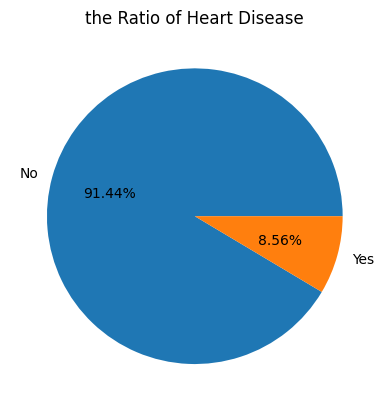

In [257]:
plt.pie(x = df['HeartDisease'].value_counts() ,autopct='%1.2f%%' ,labels=df['HeartDisease'].value_counts().index)
plt.title('the Ratio of Heart Disease')
plt.show

In [258]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [259]:
df['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [260]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [261]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex     HeartDisease
Female  No              156571
        Yes              11234
Male    No              135851
        Yes              16139
Name: HeartDisease, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='count'>

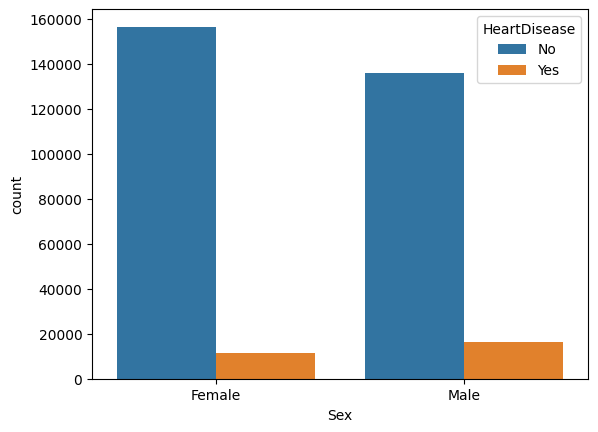

In [262]:
sns.countplot(x = 'Sex', hue='HeartDisease', data=df) 

<AxesSubplot: xlabel='Smoking', ylabel='count'>

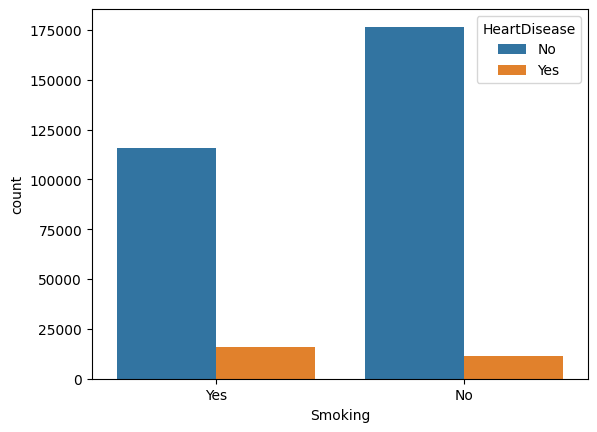

In [263]:
sns.countplot(x = 'Smoking', hue='HeartDisease', data=df) 

In [264]:
df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

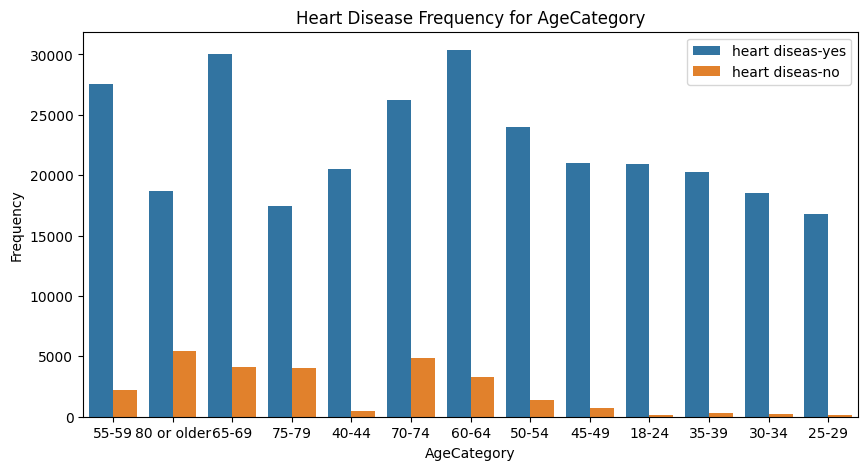

In [265]:
#show Heart Disease Frequency for AgeCategory
plt.figure(figsize=(10,5))
sns.countplot(x='AgeCategory', data=df, hue='HeartDisease')
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["heart diseas-yes", "heart diseas-no"])
plt.ylabel('Frequency')
plt.show()

# Preprocess the dataset

# Label Encoding the objet type data 

In [266]:
from sklearn.preprocessing import LabelEncoder

In [267]:
label = LabelEncoder()

In [268]:
df.select_dtypes(include=object).columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [269]:
from pandas.core.dtypes.common import is_numeric_dtype

for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [270]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [271]:
df_1 = df.copy()

In [272]:
df_1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [273]:
df_2 = df.copy()

In [274]:
df_3 = df.copy()

In [275]:
df_4 = df.copy()

# seperate x, y


In [276]:
x = df.drop('HeartDisease',axis=1) #separate dependent and independent variable
y = df['HeartDisease'] 

In [277]:
x.shape

(319795, 17)

In [278]:
y.shape

(319795,)

In [279]:
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [280]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64

# Imbalanced Data Handling

In [281]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [282]:
df.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [283]:
#from imblearn.combine import SMOTETomek

In [284]:
#sm = SMOTETomek(random_state=100)

In [285]:
y.value_counts() # before sampling

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [286]:
#X,Y = sm.fit_resample(x,y)

In [287]:
#X.shape

In [288]:
#Y.shape

In [289]:
#Y.value_counts()

# Cross Validation 

# # Hold Out Cross Validation

In [290]:
from sklearn.model_selection import train_test_split

In [291]:
train , test = train_test_split(df, train_size=.80, random_state=42) 

In [292]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
95877,0,23.33,1,0,0,0,0,0,1,11,5,0,1,4,7,0,0,0
228939,1,27.46,1,0,1,30,0,0,1,7,5,0,1,2,6,0,0,0
260256,0,32.69,0,0,0,2,2,0,1,6,3,0,0,4,8,0,0,0
84785,0,31.32,0,0,0,0,0,0,0,1,5,0,1,0,8,0,0,0
83845,1,24.63,1,0,0,2,10,0,1,12,5,2,1,2,7,0,0,0


In [293]:
test.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
271884,0,27.63,1,0,0,0,25,0,0,1,3,0,1,4,7,0,0,0
270361,0,21.95,0,0,0,0,20,0,0,2,5,0,1,0,6,0,0,1
219060,0,31.32,1,0,0,0,0,0,0,4,5,0,1,4,6,1,0,0
24010,0,40.35,0,0,0,30,0,0,0,9,5,0,0,2,8,0,0,0
181930,0,35.61,1,0,0,30,30,1,0,8,5,0,0,1,4,1,0,1


In [294]:
train.shape

(255836, 18)

In [295]:
test.shape

(63959, 18)

# Oversampling

In [296]:
from imblearn.over_sampling import RandomOverSampler

In [297]:
over = RandomOverSampler(random_state=100)

In [298]:
x_new , y_new = over.fit_resample(x,y)

In [299]:
x_new.shape

(584844, 17)

In [300]:
y_new.shape

(584844,)

In [301]:
from sklearn.model_selection import train_test_split

In [302]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.75,random_state=42)

In [303]:
xtrain.head() 

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
370055,26.29,1,0,0,30,14,1,0,9,5,2,0,3,5,0,0,0
562784,31.85,0,0,0,2,4,0,1,11,5,2,0,1,9,0,0,0
178333,37.20,0,0,0,0,0,0,0,7,5,0,0,2,7,0,0,0
450618,33.20,1,0,0,0,2,0,0,9,4,0,0,2,7,0,0,0
114989,31.82,0,0,0,7,7,0,0,10,2,0,1,1,8,1,0,0


In [304]:
xtest.shape

(146211, 17)

In [305]:
xtest.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
498280,20.94,1,0,0,0,0,0,0,10,5,2,0,1,8,0,0,0
103928,32.32,1,0,0,30,0,0,1,10,2,2,0,1,6,0,0,0
134719,24.56,0,0,0,0,0,0,0,1,3,0,1,2,12,0,0,0
6075,37.45,0,0,0,0,0,0,0,5,4,2,1,4,6,0,0,0
547424,18.47,1,0,0,25,25,1,1,10,5,0,0,3,4,0,1,0


In [306]:
ytrain.head()

370055    1
562784    1
178333    0
450618    1
114989    0
Name: HeartDisease, dtype: int64

In [307]:
ytrain.shape

(438633,)

In [308]:
ytest.head()

498280    1
103928    0
134719    0
6075      0
547424    1
Name: HeartDisease, dtype: int64

# Decission Tree Classifier After sampling

In [309]:
from sklearn.tree import DecisionTreeClassifier

In [310]:
Clf = DecisionTreeClassifier() 

In [311]:
Clf.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [312]:
Clf_test = Clf.score(xtest,ytest)
print("Test accuracy for Decesion Tree after sampling",Clf_test)
Clf_train = Clf.score(xtrain,ytrain)
print("Training accuracy for Decesion Tree after sampling",Clf_train)

Test accuracy for Decesion Tree after sampling 0.9534508347525152
Training accuracy for Decesion Tree after sampling 0.9965916837082481


# # Decision Tree Classifier without Sampling

In [313]:
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [314]:
y.shape

(319795,)

In [315]:
xtrain.shape

(438633, 17)

In [316]:
xtest.shape

(146211, 17)

In [317]:
x.shape

(319795, 17)

In [318]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.75,random_state=42) 
Clf.fit(xtrain1, ytrain1) 
DecisionTreeClassifier()



DecisionTreeClassifier()

In [319]:
Clf_test_1 = Clf.score(xtest1,ytest1) 
print("Test accuracy for Decesion Tree without sampling",Clf_test_1)
Clf_train_1 = Clf.score(xtrain1,ytrain1)
print("Training accuracy for Decesion Tree without sampling",Clf_train_1)

Test accuracy for Decesion Tree without sampling 0.8622246682259941
Training accuracy for Decesion Tree without sampling 0.9969897350800097


# XGBoost Classifier


# # After sampling

In [320]:
xgb.fit(xtrain,ytrain)
xgb_test = xgb.score(xtest, ytest)
print("Test accuracy for XGBoost after sampling",xgb_test)
xgb_train = xgb.score(xtrain, ytrain)
print("Test accuracy for XGBoost after sampling",xgb_train)

Test accuracy for XGBoost after sampling 0.7851256061445445
Test accuracy for XGBoost after sampling 0.7891243932855029


# #Before sampling  XGBoost

In [321]:

xgb.fit(xtrain1,ytrain1)
xgb_test_1 = xgb.score(xtest1, ytest1)
print("Test accuracy for XGBoost without sampling",xgb_test_1)
xgb_train_1 = xgb.score(xtrain1, ytrain1)
print("Test accuracy for XGBoost without sampling",xgb_train_1)

Test accuracy for XGBoost without sampling 0.9137575204192673
Test accuracy for XGBoost without sampling 0.9219749339159294


# Ada Boost after Sampling

In [322]:

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ada_test = ada.score(xtest,ytest)
print("Test accuracy for AdaBoost after sampling",ada_test)
ada_train = ada.score(xtrain,ytrain)
print("Test accuracy for AdaBoost after sampling",ada_train)

Test accuracy for AdaBoost after sampling 0.7645184014882601
Test accuracy for AdaBoost after sampling 0.763547202330878


# Before Sampling Ada boost

In [323]:
ada.fit(xtrain1, ytrain1)
ada_test_1 = ada.score(xtest1, ytest1)
print("Test accuracy for AdaBoost without sampling",ada_test_1)
ada_train_1 = ada.score(xtrain1, ytrain1)
print("Training accuracy for AdaBoost without  sampling",rfl_acc_train_1)

Test accuracy for AdaBoost without sampling 0.9138700921837671
Training accuracy for AdaBoost without  sampling 0.9965894038980195


# Random Forest Classifier After sampling

In [324]:
from sklearn.ensemble import RandomForestClassifier
rfl = RandomForestClassifier()
rfl.fit(xtrain, ytrain)
rfl.score(xtest, ytest)
rfl_acc_test = rfl.score(xtest, ytest)
print("Test accuracy for RandomForest after sampling",rfl_acc_test)
rfl_acc_train_1 = rfl.score(xtrain, ytrain)
print("Training accuracy for RandomForest after sampling",rfl_acc_train_1)

Test accuracy for RandomForest after sampling 0.9673827550594688
Training accuracy for RandomForest after sampling 0.9965871240877909


# Without Sampling Random Forest

In [325]:
rfl.fit(xtrain1, ytrain1)
rfl_acc = rfl.score(xtest1, ytest1)
print("Test accuracy for RandomForest without sampling",rfl_acc)

rfl_acc_train = rfl.score(xtrain1, ytrain1)
print("Training accuracy for RandomForest without sampling",rfl_acc_train)

Test accuracy for RandomForest without sampling 0.9052145742911106
Training accuracy for RandomForest without sampling 0.996927194950093


# K Fold Cross Validation

In [326]:

#from sklearn.model_selection import KFold, cross_val_score
##kfold = KFold(n_splits=5, shuffle=True) #each fold contain 25% data
#result = cross_val_score(rfl, x_new, y_new, cv=kfold) 

#result

# Stratified k fold cross Validation

In [327]:
#from sklearn.model_selection import StratifiedKFold
#st = StratifiedKFold(n_splits=5)
#score2 = cross_val_score(xgb, x_new, y_new,cv=st)
#score2


# ****Feature Selection

# Extra Trees Classifier


In [328]:
x.shape

(319795, 17)

In [329]:
y.shape

(319795,)

In [330]:
x_new.shape

(584844, 17)

In [331]:
y_new.shape


(584844,)

In [332]:
from sklearn.ensemble import ExtraTreesClassifier # Decison tree
extr = ExtraTreesClassifier()
extr.fit(x_new,y_new)
ExtraTreesClassifier()
extr.feature_importances_ # IG from decision tree

array([0.2442153 , 0.02103591, 0.00846745, 0.03148602, 0.06944531,
       0.06362867, 0.05099696, 0.02480257, 0.18244346, 0.03549998,
       0.03969854, 0.01725272, 0.06986486, 0.10029822, 0.01411374,
       0.01319998, 0.01355029])

In [333]:
feature_importance = extr.feature_importances_
feature_importance #info gain

array([0.2442153 , 0.02103591, 0.00846745, 0.03148602, 0.06944531,
       0.06362867, 0.05099696, 0.02480257, 0.18244346, 0.03549998,
       0.03969854, 0.01725272, 0.06986486, 0.10029822, 0.01411374,
       0.01319998, 0.01355029])

In [334]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])
imp

,Gain_Score
0,0.244215
1,0.021036
2,0.008467
3,0.031486
4,0.069445
5,0.063629
6,0.050997
7,0.024803
8,0.182443
9,0.035500


In [335]:
x_new.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [336]:
cols = pd.DataFrame(x.columns, columns=['Feature_Names'])
cols

,Feature_Names
0,BMI
1,Smoking
2,AlcoholDrinking
3,Stroke
4,PhysicalHealth
5,MentalHealth
6,DiffWalking
7,Sex
8,AgeCategory
9,Race


In [337]:
gains = pd.concat([cols,imp],axis=1)
gains

,Feature_Names,Gain_Score
0,BMI,0.244215
1,Smoking,0.021036
2,AlcoholDrinking,0.008467
3,Stroke,0.031486
4,PhysicalHealth,0.069445
5,MentalHealth,0.063629
6,DiffWalking,0.050997
7,Sex,0.024803
8,AgeCategory,0.182443
9,Race,0.035500


In [338]:
gains.nlargest(15,'Gain_Score') #smallest()

,Feature_Names,Gain_Score
0,BMI,0.244215
8,AgeCategory,0.182443
13,SleepTime,0.100298
12,GenHealth,0.069865
4,PhysicalHealth,0.069445
5,MentalHealth,0.063629
6,DiffWalking,0.050997
10,Diabetic,0.039699
9,Race,0.035500
3,Stroke,0.031486


In [339]:
gains.nsmallest(8,'Gain_Score')

,Feature_Names,Gain_Score
2,AlcoholDrinking,0.008467
15,KidneyDisease,0.013200
16,SkinCancer,0.013550
14,Asthma,0.014114
11,PhysicalActivity,0.017253
1,Smoking,0.021036
7,Sex,0.024803
3,Stroke,0.031486


In [340]:
newx = gains.nlargest(17,'Gain_Score')
newx

,Feature_Names,Gain_Score
0,BMI,0.244215
8,AgeCategory,0.182443
13,SleepTime,0.100298
12,GenHealth,0.069865
4,PhysicalHealth,0.069445
5,MentalHealth,0.063629
6,DiffWalking,0.050997
10,Diabetic,0.039699
9,Race,0.035500
3,Stroke,0.031486


<AxesSubplot: >

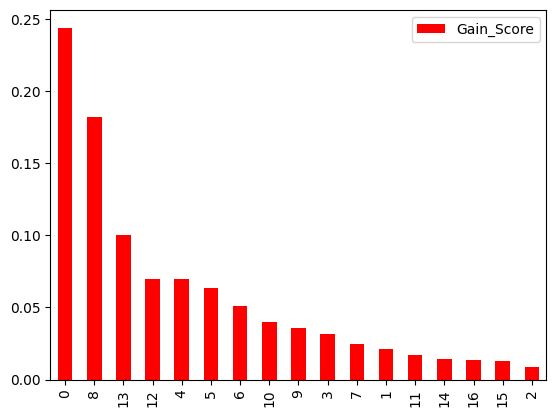

In [341]:
newx.plot(kind='bar',color=['red']) # barh mean horizontal

In [342]:
import matplotlib.pyplot as plt

<AxesSubplot: >

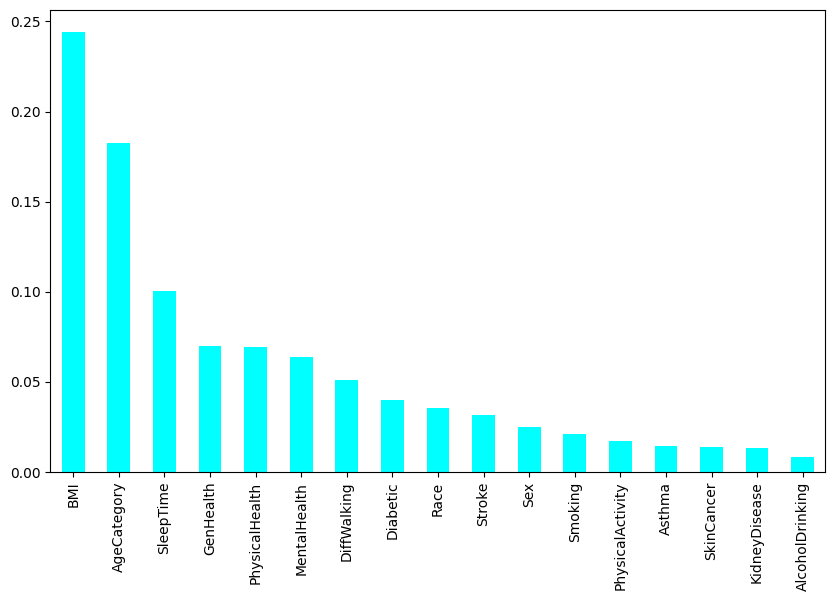

In [343]:
features = pd.Series(extr.feature_importances_, index = x.columns)
plt.figure(figsize=(10,6))
features.nlargest(17).plot(kind='bar', color='cyan')
#plt.savefig('score1.png')

<AxesSubplot: >

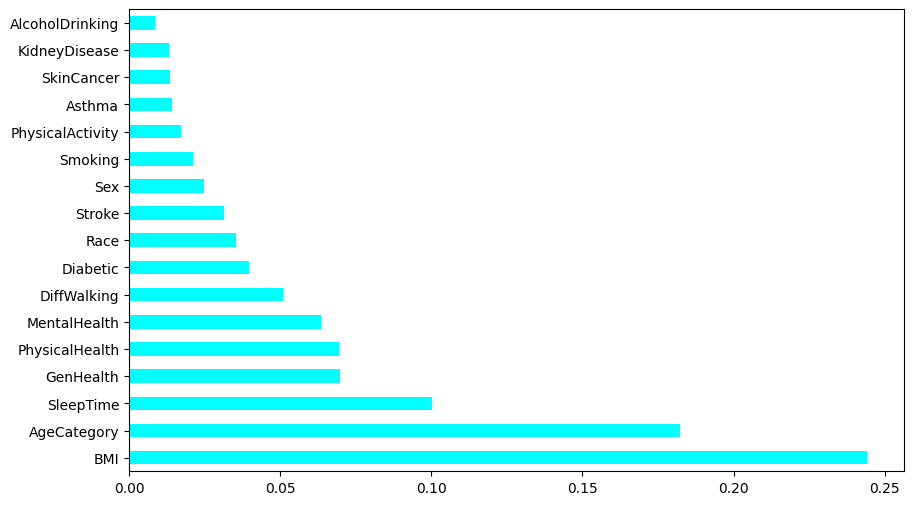

In [344]:
features = pd.Series(extr.feature_importances_, index = x.columns)
plt.figure(figsize=(10,6))
features.nlargest(20).plot(kind='barh', color='cyan') #bar=vertical but barh = horizontal
#plt.savefig('score1.png')

# Show data correlation

In [345]:
#x = newx
x_new.corr()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
BMI,1.000000,0.016982,-0.031876,0.020036,0.121328,0.072383,0.199243,0.025547,-0.029789,-0.038264,0.228745,-0.159379,0.000804,-0.042110,0.107325,0.072038,-0.038058
Smoking,0.016982,1.000000,0.088308,0.073122,0.130435,0.086300,0.134754,0.112608,0.129049,0.060646,0.076067,-0.106960,-0.000740,-0.020680,0.033542,0.037445,0.033540
AlcoholDrinking,-0.031876,0.088308,1.000000,-0.024102,-0.025309,0.043733,-0.044746,0.001551,-0.083502,0.026752,-0.068703,0.015923,0.005375,-0.000679,-0.007363,-0.036590,-0.011319
Stroke,0.020036,0.073122,-0.024102,1.000000,0.172492,0.075170,0.205285,-0.002589,0.141994,-0.027330,0.127069,-0.106483,-0.027907,0.010747,0.060423,0.107586,0.045416
PhysicalHealth,0.121328,0.130435,-0.025309,0.172492,1.000000,0.323186,0.455161,-0.041027,0.117180,-0.002812,0.181201,-0.274194,-0.032481,-0.067155,0.141202,0.177775,0.041378
MentalHealth,0.072383,0.086300,0.043733,0.075170,0.323186,1.000000,0.192814,-0.111660,-0.145239,-0.037783,0.049798,-0.125621,-0.011734,-0.122860,0.124730,0.055126,-0.032599
DiffWalking,0.199243,0.134754,-0.044746,0.205285,0.455161,0.192814,1.000000,-0.078519,0.243597,-0.024628,0.235936,-0.325465,-0.059112,-0.033106,0.138826,0.189406,0.064032
Sex,0.025547,0.112608,0.001551,-0.002589,-0.041027,-0.111660,-0.078519,1.000000,0.003485,0.051806,0.018540,0.062110,0.003880,0.006095,-0.091096,-0.010275,0.058635
AgeCategory,-0.029789,0.129049,-0.083502,0.141994,0.117180,-0.145239,0.243597,0.003485,1.000000,0.172398,0.195205,-0.137317,0.029662,0.119869,-0.051848,0.137445,0.263164
Race,-0.038264,0.060646,0.026752,-0.027330,-0.002812,-0.037783,-0.024628,0.051806,0.172398,1.000000,-0.048510,0.043616,0.049505,0.042653,-0.039102,0.001706,0.146618


<AxesSubplot: >

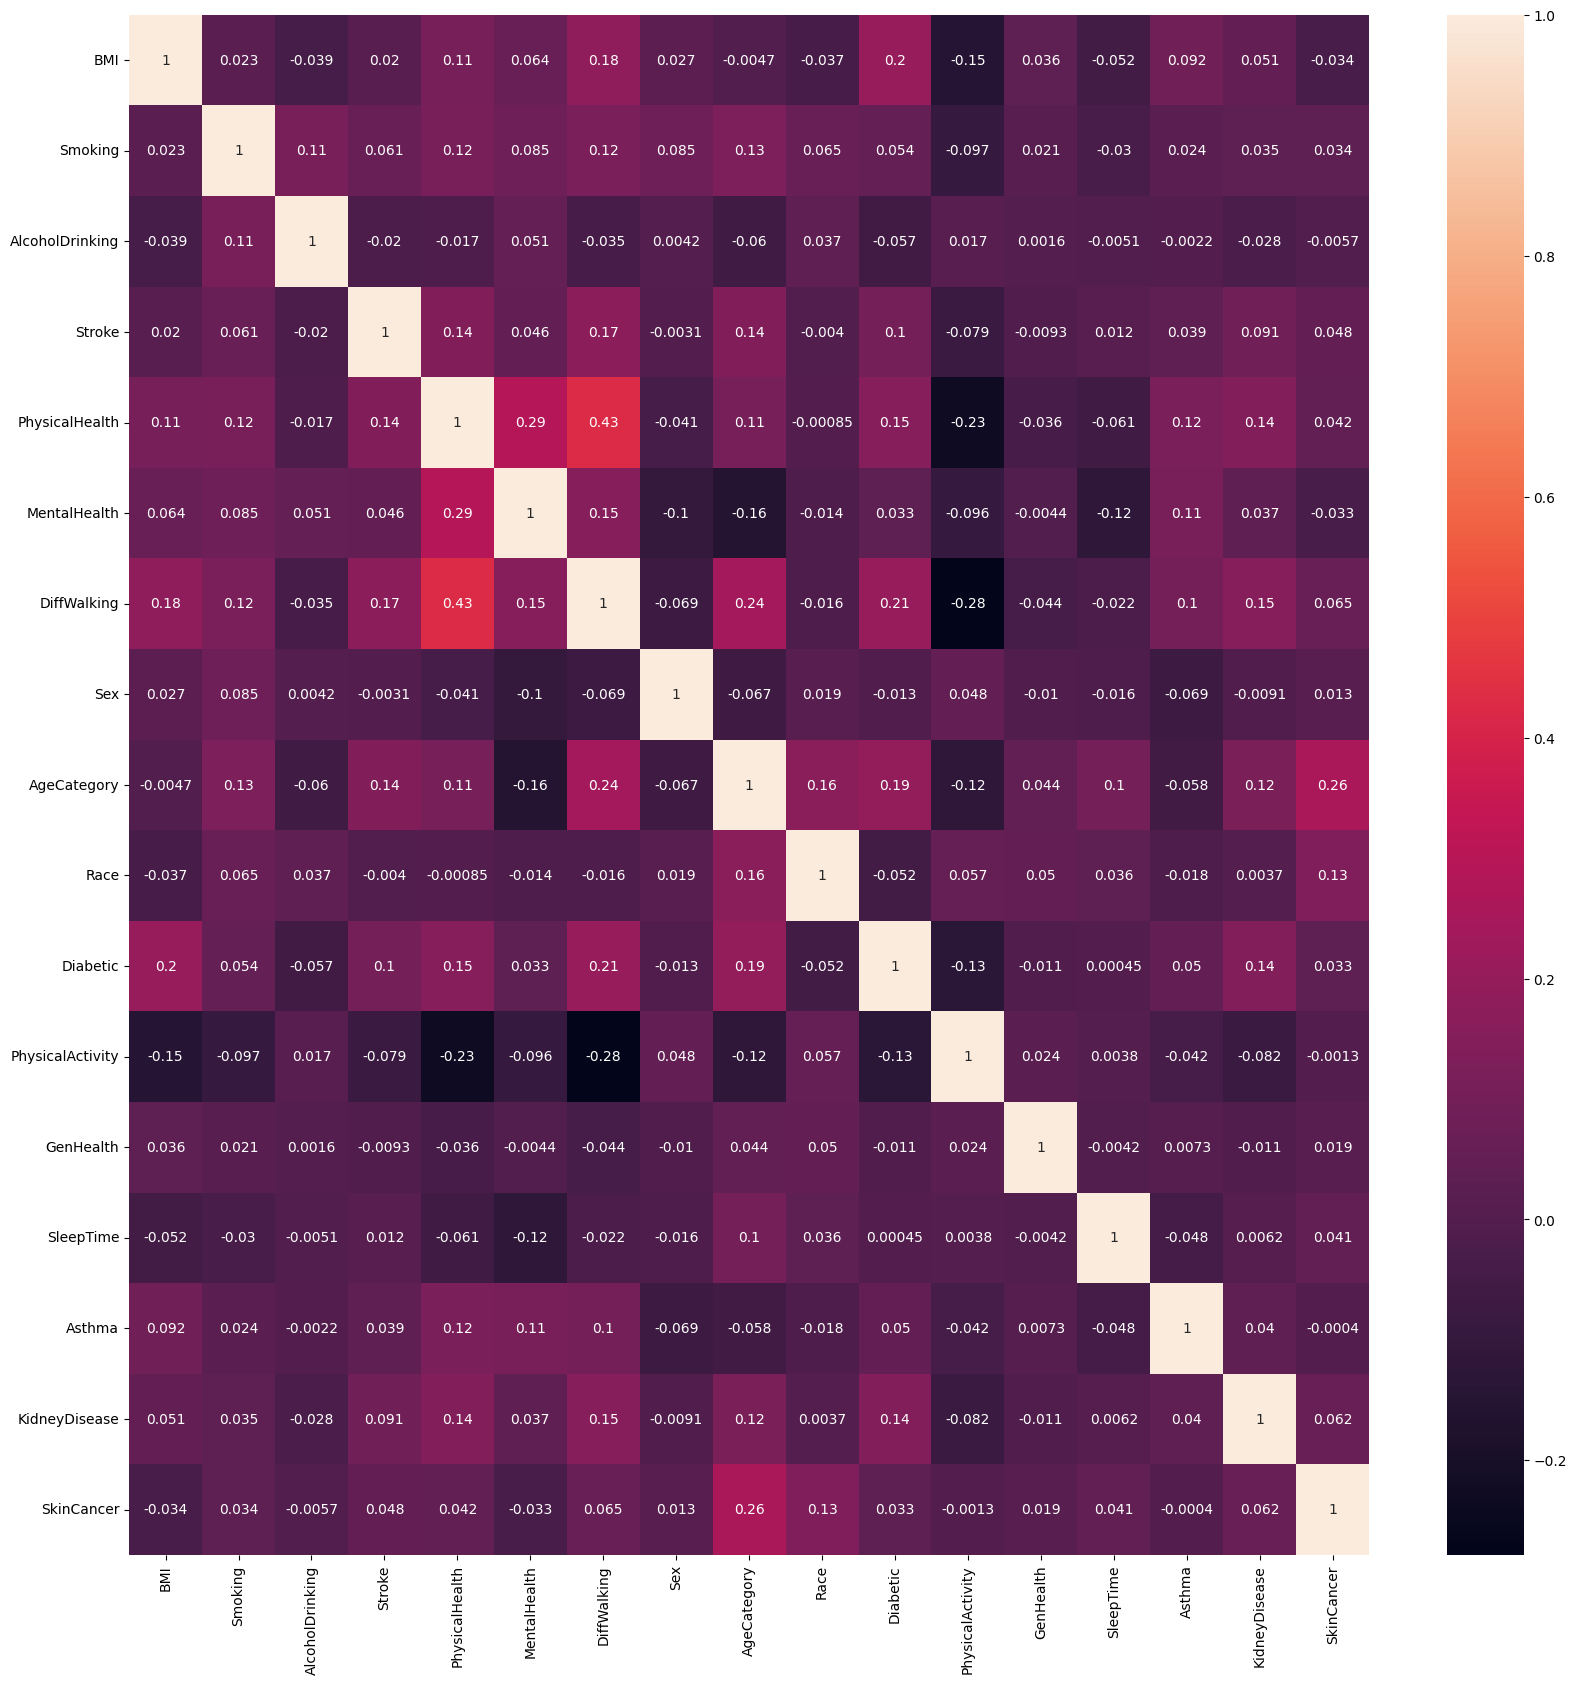

In [346]:
feature_names = x.columns #features name
colname = x_new.corr().index #features name
plt.figure(figsize=(20,20))
sns.heatmap(df[colname].corr(),annot=True)

# Select K Best

In [347]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression #chi2 only when features are non negative

In [348]:
model1 = SelectKBest(score_func=f_classif)

In [349]:
feature_score = model1.fit(x_new,y_new)

In [350]:
feature_score.scores_

array([5.00141110e+03, 2.15798391e+04, 2.22619432e+03, 3.24131281e+04,
       3.69869959e+04, 1.34072527e+03, 5.40194461e+04, 9.40458968e+03,
       1.41572318e+05, 2.49150883e+03, 4.01568152e+04, 1.61014807e+04,
       2.71520686e+02, 1.18292256e+02, 2.78821659e+03, 2.01774493e+04,
       1.22698929e+04])

In [351]:
cols = pd.DataFrame(feature_score.scores_ , columns=['Feature_Scores'])
cols

,Feature_Scores
0,5001.411099
1,21579.839117
2,2226.194317
3,32413.128088
4,36986.995896
5,1340.725272
6,54019.446054
7,9404.589682
8,141572.317660
9,2491.508830


In [352]:
x_new.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [353]:
col2 = pd.DataFrame(x_new.columns, columns=['Feature_Names'])
col2.head()


,Feature_Names
0,BMI
1,Smoking
2,AlcoholDrinking
3,Stroke
4,PhysicalHealth


In [ ]:
scores = pd.concat([col2,cols],axis=1)
scores

,Feature_Names,Feature_Scores
0,BMI,5001.411099
1,Smoking,21579.839117
2,AlcoholDrinking,2226.194317
3,Stroke,32413.128088
4,PhysicalHealth,36986.995896
5,MentalHealth,1340.725272
6,DiffWalking,54019.446054
7,Sex,9404.589682
8,AgeCategory,141572.317660
9,Race,2491.508830


In [ ]:
df_1 = df.drop(['GenHealth','SleepTime'], axis=1)

# PCA

In [ ]:
#FEATURE SCALING 
from sklearn.preprocessing import MinMaxScaler  #SandardScaler()

In [ ]:
mmx = MinMaxScaler() #feature_range=(2,5)

In [ ]:
scaled_x = mmx.fit_transform(x_new)

In [ ]:
scaled_x.shape

In [ ]:
scaled_x

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)

In [ ]:
x_pca

In [ ]:
features = pd.DataFrame(x_pca, columns=['pca1','pca2','pca3'])

In [ ]:
features

# Split X,Y using features after PCA

In [ ]:
#xtrain, xtest, ytrain, ytest = train_test_split(features, y_new, test_size=.25,random_state=42)

In [ ]:
#y_new.head()

In [ ]:
#y_new.shape

In [ ]:
#xtrain.head()

In [ ]:
x_new.shape

In [ ]:
y_new.shape

In [372]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


In [373]:
xtrain.shape

(409390, 17)

In [374]:
xtest.shape

(175454, 17)

# MODEL TrainUp AND EVALUATION

# KNeighborsClassifier

In [375]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
acc = metrics.accuracy_score(ytest, ypred)
print("Test accuracy for KNN :", acc)
knn_training_score= knn.score(xtrain, ytrain) 
print("Training score  for KNN:", knn_training_score)
prec = metrics.precision_score(ytest, ypred)
print("Precesion score for KNN:", prec)
rec = metrics.recall_score(ytest, ypred)
print("Recall score  for KNN:", rec)
f1 = metrics.f1_score(ytest, ypred)
print("F_1 score  for KNN:", f1)
cm = metrics.confusion_matrix(ytest, ypred)
print("confusion matrics:",cm)
#sns.heatmap(cm, annot=True)

Test accuracy for KNN : 0.8847561184128033
Training score  for KNN: 0.9164806175040915
Precesion score for KNN: 0.8172975913558941
Recall score  for KNN: 0.9915678554359453
F_1 score  for KNN: 0.8960379240490709
confusion matrics: [[68097 19479]
 [  741 87137]]


# # RandomForestClassifier

In [376]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(xtrain, ytrain)
ypred_1 = rf.predict(xtest)

rf_test_score = rf.score(xtest, ytest)
print("Testing accuracy RandomForest:", rf_test_score)
rf_train_score = rf.score(xtrain, ytrain)
print("Training accuracy RandomForest:", rf_train_score)
prec_rf = metrics.precision_score(ytest, ypred_1)
print("Precesion score for RandomForest:", prec_rf)
rec_rf = metrics.recall_score(ytest, ypred_1)
print("Recall score  for RandomForest :", rec_rf)
f1_rf = metrics.f1_score(ytest, ypred_1)
print("F_1 score  for RandomForest:", f1_rf)
cm_rf = metrics.confusion_matrix(ytest, ypred_1)
print("confusion matrics:",cm_rf)
#sns.heatmap(cm, annot=True)

Testing accuracy RandomForest: 0.9648454865662794
Training accuracy RandomForest: 0.9965631793644202
Precesion score for RandomForest: 0.9347479089961053
Recall score  for RandomForest : 0.9995903411547827
F_1 score  for RandomForest: 0.9660823086905835
confusion matrics: [[81444  6132]
 [   36 87842]]


# DecisionTreeClassifier

In [377]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier() 

dt.fit(xtrain,ytrain)
ypred_2 = dt.predict(xtest)
dt_test_score= dt.score(xtest,ytest) # after sampling
print("Testing Score Decision Tree:", dt_test_score)

dt_train_score= dt.score(xtrain,ytrain) # after sampling
print("Training Score Decision Tree:", dt_train_score)

prec_dt = metrics.precision_score(ytest, ypred_2)
print("Precesion score for Decision Tree :", prec_dt)
rec_dt = metrics.recall_score(ytest, ypred_2)
print("Recall score  forDecision Tree :", rec_dt)
f1_dt = metrics.f1_score(ytest, ypred_2)
print("F_1 score  for Decision Tree:", f1_dt)
cm_dt = metrics.confusion_matrix(ytest, ypred_2)
print("confusion matrics:",cm_dt)
#sns.heatmap(cm, annot=True)

Testing Score Decision Tree: 0.950340260125161
Training Score Decision Tree: 0.9965680646815994
Precesion score for Decision Tree : 0.9102706288415096
Recall score  forDecision Tree : 0.9993627529074398
F_1 score  for Decision Tree: 0.9527384368372235
confusion matrics: [[78919  8657]
 [   56 87822]]


# XGBoostClassifier

In [378]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(xtrain, ytrain)
ypred_3 = xgb.predict(xtest)
xgb_test_score= xgb.score(xtest,ytest) # after sampling
print("Testing Score XGBoostClassifier:", xgb_test_score)

xgb_train_score= xgb.score(xtrain,ytrain) # after sampling
print("Training Score XGBoostClassifier:", xgb_train_score)

prec_xgb = metrics.precision_score(ytest, ypred_3)
print("Precesion score for XGBoostClassifier:", prec_xgb)
rec_xgb = metrics.recall_score(ytest, ypred_3)
print("Recall score  for XGBoostClassifier :", rec_xgb)
f1_xgb = metrics.f1_score(ytest, ypred_3)
print("F_1 score  for XGBoostClassifier:", f1_xgb)
cm_xgb = metrics.confusion_matrix(ytest, ypred_3)
print("confusion matrics:",cm_xgb)
#sns.heatmap(cm, annot=True)

Testing Score XGBoostClassifier: 0.7864910460861536
Training Score XGBoostClassifier: 0.792017391729158
Precesion score for XGBoostClassifier: 0.7625256448975766
Recall score  for XGBoostClassifier : 0.8332005735223833
F_1 score  for XGBoostClassifier: 0.7962980081674379
confusion matrics: [[64773 22803]
 [14658 73220]]


# Ensemble(VotingClassifier )

In [379]:
x_new.shape

(584844, 17)

In [383]:

xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)
m1 = DecisionTreeClassifier()
m2 = RandomForestClassifier()
m3 =  XGBClassifier()
m4 = KNeighborsClassifier()

ensemble = VotingClassifier(
    estimators=[('dt',m1),('rf',m2),('xgb',m3),('knn',m4) ],
    voting='hard'
)

ensemble.fit(xtrain, ytrain)

y_pred = ensemble.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9589921004935766


# Save AI MODEL

In [384]:
import pickle as pk

In [387]:
pk.dump(dt, open('/kaggle/working/DecisionTreeClassifier.save','wb'))


In [388]:
savedmodel = pk.load(open('/kaggle/working/DecisionTreeClassifier.save','rb'))

In [394]:
pk.dump(rf, open('/kaggle/working/RandomForestClassifier.save','wb'))

In [395]:
savedmodel_2 = pk.load(open('/kaggle/working/RandomForestClassifier.save','rb'))